# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [10]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Penguin (from Robust Time Series Chain Discovery with Incremental Nearest Neighbors) ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

m = 28 (~0.7 s) (MP VII)

m = 25 (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 20 (own research, interesting results!)

In [11]:
# Parameter
use_case = "chains"
data_name = "penguin2022"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "tsn") # column: "ts"
print(T)

[ 0.25594411  0.26011007  0.21782488  0.20129565  0.25547937  0.23299305
  0.21865354  0.18160117  0.1601951   0.14286594  0.18790067  0.22805687
  0.2614632   0.14884332  0.186836    0.16651816  0.12887977  0.20588628
  0.1381805   0.12716229  0.18355132  0.1171995   0.09635433  0.09730437
  0.17736574  0.11269904  0.02186165  0.04342711  0.06429658 -0.01853177
 -0.01628358 -0.0572908   0.04816524  0.10648321  0.1205091   0.11104897
  0.17038879  0.18347827  0.13423821  0.12519553  0.14738692  0.14826094
  0.12130623  0.12580109  0.21501145  0.23252887  0.11020671  0.10017961
  0.12106937  0.17218844  0.21693818  0.29659288  0.29266072  0.29917174
  0.31016513  0.25305747  0.2214222   0.25586991  0.27200073  0.26067568
  0.25028921  0.24107423  0.27738768  0.24065541  0.20936185  0.1895995
  0.13259032  0.22147192  0.19426897  0.13571883  0.12443896  0.09595377
  0.07157449  0.09043689  0.12830014  0.15498904  0.15745597  0.18535517
  0.29927819  0.31416229  0.2945783   0.28263545  0.

### Experiments ###

In [12]:
# Hyperparameter
target_w = 25
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4, 5]


In [13]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case)

Calculated MP for: w=25, m=25, d=1
Calculated MP for: w=25, m=13, d=2
Calculated MP for: w=25, m=9, d=3
Calculated MP for: w=25, m=7, d=4
Calculated MP for: w=26, m=6, d=5


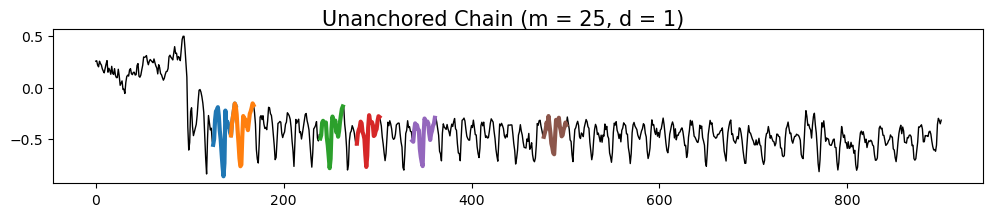

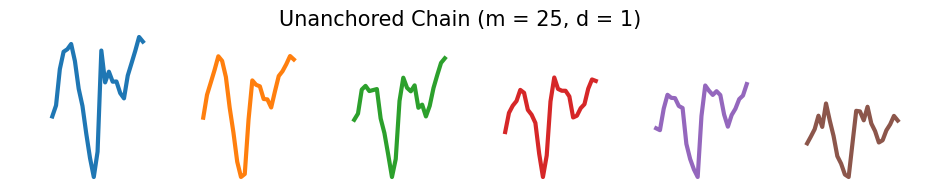

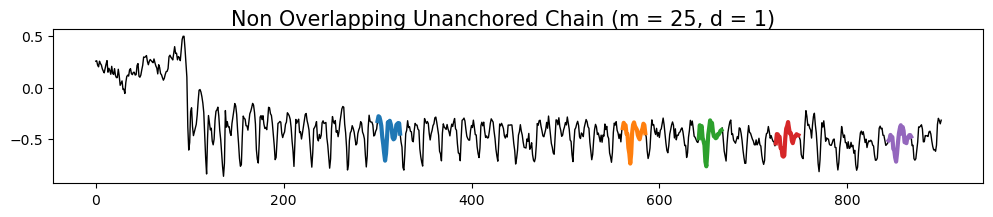

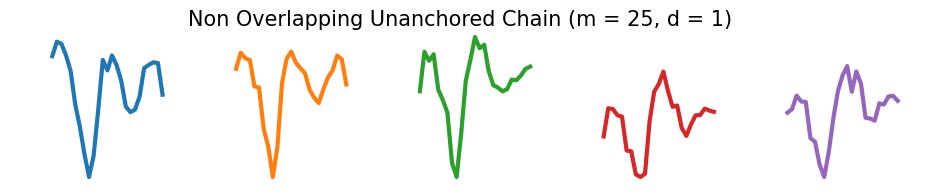

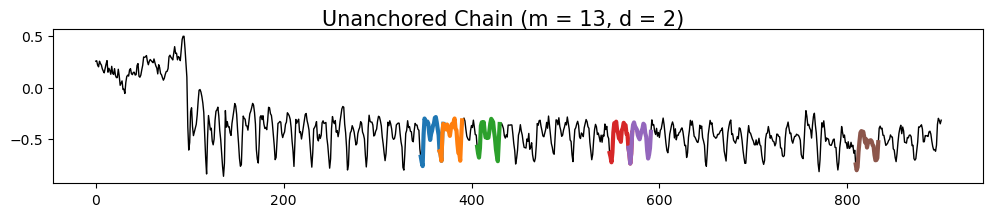

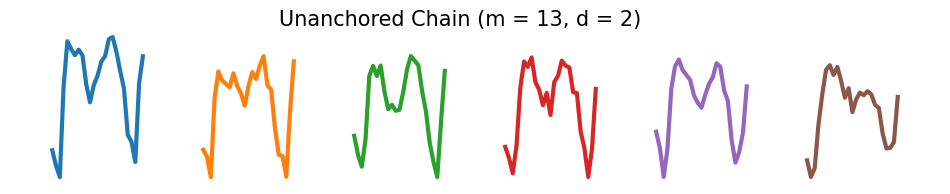

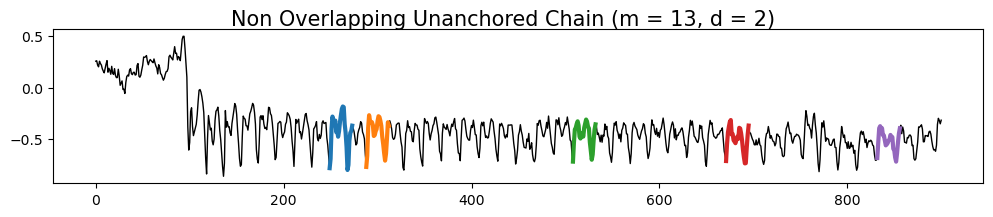

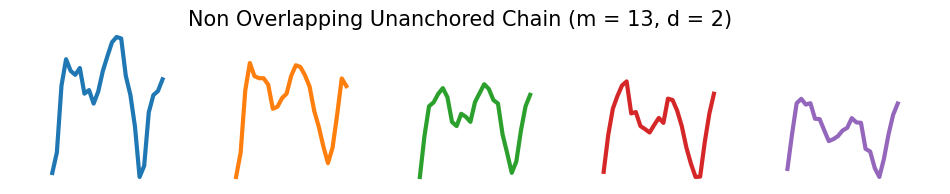

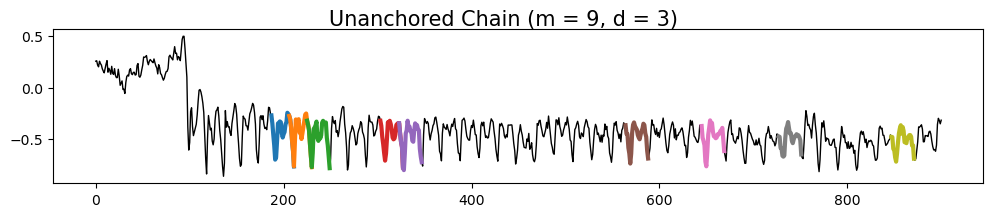

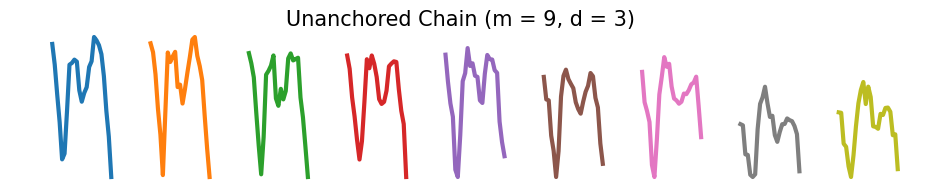

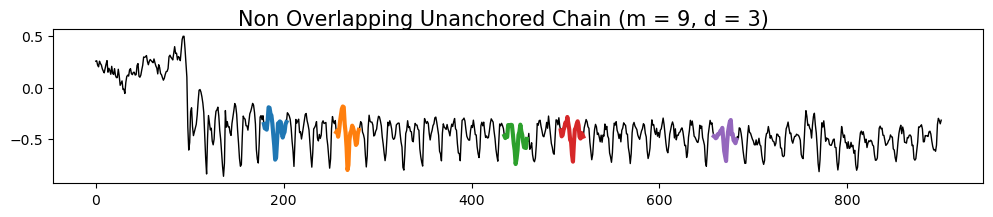

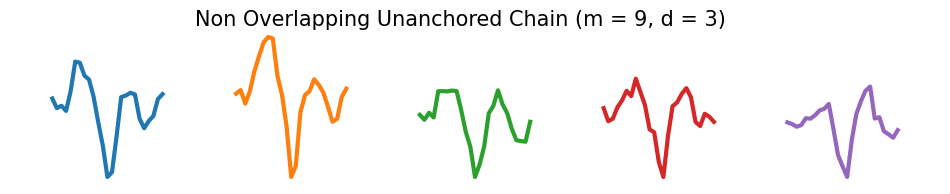

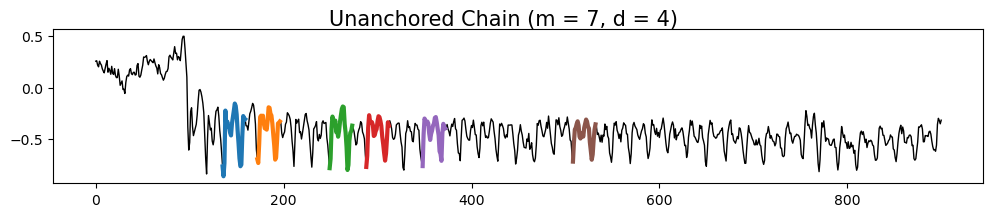

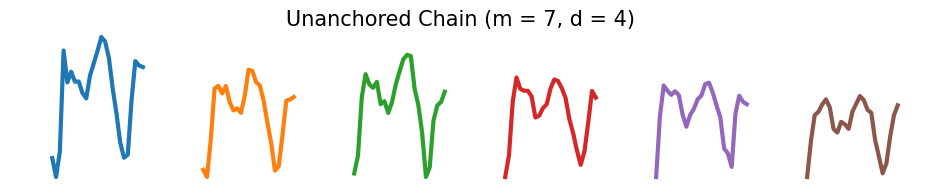

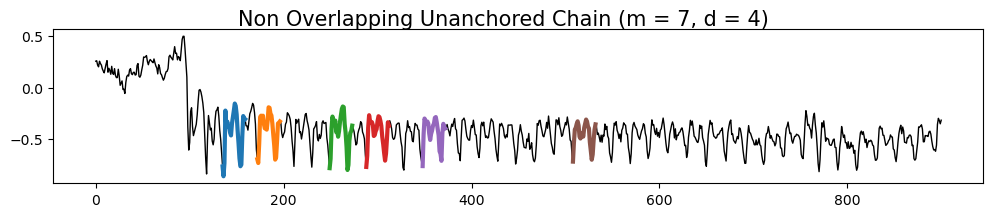

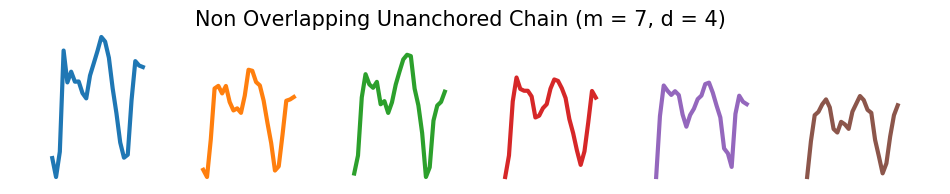

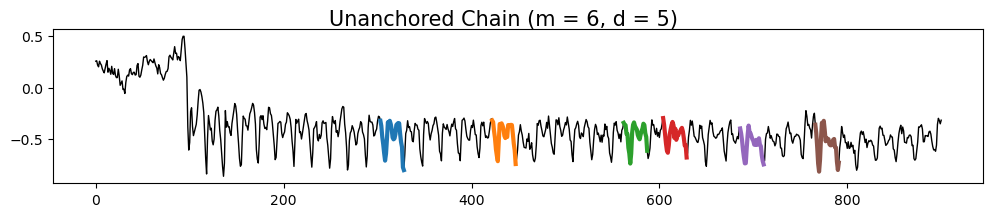

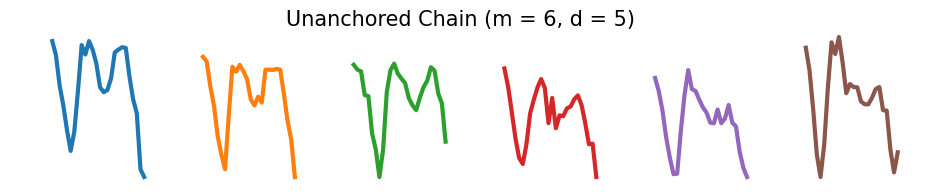

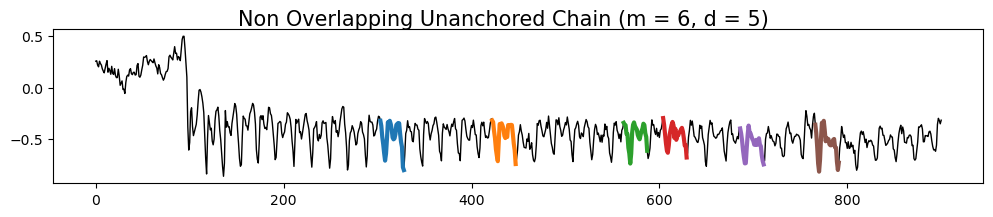

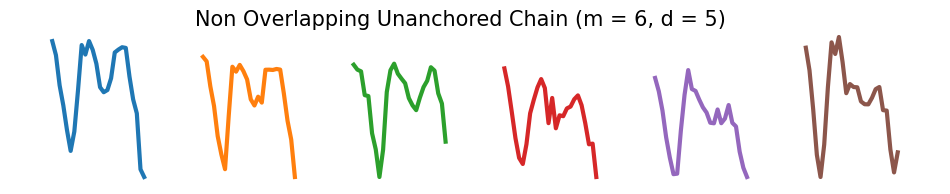

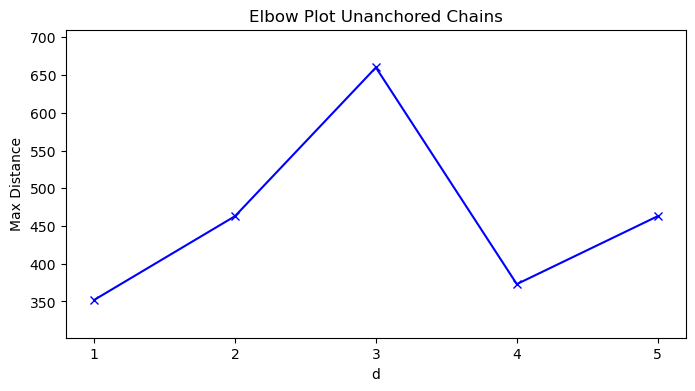

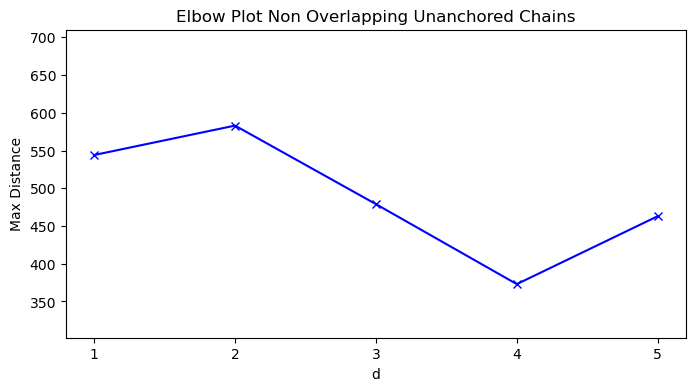

In [14]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)